<a href="https://colab.research.google.com/github/Sandyyy123/AI/blob/main/31st_Jan_1st_Feb_2026.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
`!pip install -q langchain langchain_openai langchain_core

In [ ]:
import dotenv
import os
dotenv.load_dotenv("/content/.env")

True

In [ ]:
import os
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(
    openai_api_key=os.getenv("OPENROUTER_API_KEY"),
    openai_api_base=os.getenv("OPENROUTER_BASE_URL"),
    model_name="gpt-4o-mini-2024-07-18", # Or any model on OpenRouter
    default_headers={
        "HTTP-Referer": os.getenv("APP_URL"),
        "X-Title": os.getenv("APP_NAME"),
    }
)

In [8]:
import json, os, re
from google.colab import files

# 1) Put your CURRENT notebook filename here (exactly as shown in Colab title bar)
NOTEBOOK_NAME = "31st_Jan_1st_Feb_2026.ipynb"

# 2) If the notebook file isn't in /content yet, download it from Colab UI and upload it here.
#    (Files -> Upload, or run files.upload() below)
if not os.path.exists(NOTEBOOK_NAME):
    print(f"'{NOTEBOOK_NAME}' not found in /content. Please upload it now...")
    uploaded = files.upload()  # choose the .ipynb from your computer
    # If user uploaded a file with a different name, pick the first uploaded
    if uploaded:
        NOTEBOOK_NAME = next(iter(uploaded.keys()))
        print("Using uploaded file:", NOTEBOOK_NAME)

out_name = re.sub(r"\.ipynb$", "", NOTEBOOK_NAME) + "_clean.ipynb"

# 3) Load notebook JSON
with open(NOTEBOOK_NAME, "r", encoding="utf-8") as f:
    nb = json.load(f)

# 4) Remove problematic widget metadata (fixes GitHub "Invalid Notebook")
md = nb.get("metadata", {})
if "widgets" in md:
    md.pop("widgets", None)
nb["metadata"] = md

# (Optional but helpful) remove per-cell widget outputs' metadata (safe)
for cell in nb.get("cells", []):
    # remove cell-level metadata.widgets if present
    c_md = cell.get("metadata", {})
    if "widgets" in c_md:
        c_md.pop("widgets", None)
    cell["metadata"] = c_md

# 5) Save cleaned notebook
with open(out_name, "w", encoding="utf-8") as f:
    json.dump(nb, f, ensure_ascii=False, indent=1)

print("✅ Saved cleaned notebook:", out_name)

# 6) Download cleaned notebook to your computer
files.download(out_name)


'31st_Jan_1st_Feb_2026.ipynb' not found in /content. Please upload it now...


Saving 31st_Jan_1st_Feb_2026.ipynb to 31st_Jan_1st_Feb_2026.ipynb
Using uploaded file: 31st_Jan_1st_Feb_2026.ipynb
✅ Saved cleaned notebook: 31st_Jan_1st_Feb_2026_clean.ipynb


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Sentence Embedding Models

- OpenAI Text Embedding large is based on the concept of Sentence Transformer
- Returns a sentence embedding vector of 3072 dimension which can be reduced.
- The context limit for this model is 8191 tokens

In [ ]:
from langchain_openai import OpenAIEmbeddings
open_ai_em = OpenAIEmbeddings(
    openai_api_key=os.getenv("OPENROUTER_API_KEY"),
    openai_api_base=os.getenv("OPENROUTER_BASE_URL"),
    model="text-embedding-3-large", # Or any model on OpenRouter
    default_headers={
        "HTTP-Referer": os.getenv("APP_URL"),
        "X-Title": os.getenv("APP_NAME"),
    }
)

In [ ]:
len(open_ai_em.embed_query("Hello World"))

3072

##Hugging Face Sentence Embedding Model

In [ ]:
!pip install -q langchain_huggingface sentence_transformers

In [ ]:
from langchain_huggingface import HuggingFaceEmbeddings
import transformers
import sentence_transformers

model_name = "BAAI/bge-m3"
model_kwargs = {'device': 'cuda'} # this will use GPU
hf_em = HuggingFaceEmbeddings(
    model_name=model_name,
    model_kwargs = model_kwargs)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/123 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/54.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/687 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.27G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.27G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/444 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

In [ ]:
len(hf_em.embed_query("Hello World"))

1024

- If you are working with english documents: use OpenAI- Small, Large (Paid)
- If you are working with other languages: Use BGE-M3 (This is best and opensource) (Free)

## Text Splitters

- Document Loaders: Text, PDF, WebBasedLoader
- Chunking (Text Splitting)
- Embedding Model for Sentences (Sentence Transformers)
- https://chunkviz.up.railway.app/


In [ ]:
!pip install -q langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 75.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 5.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.


In [ ]:
# load the document
from langchain_community.document_loaders import TextLoader
loader = TextLoader('/content/kb_modiji.txt')
doc = loader.load()

In [ ]:
doc[0].page_content

'# HISTORY OF NARENDRA MODI\n\n## Early Life and Background\n\n**Birth and Family:**\n- Born: September 17, 1950, in Vadnagar, Gujarat, India\n- Parents: Damodardas Mulchand Modi (father) and Hiraben Modi (mother)\n- Family Background: Born into a lower-middle-class family of the Ghanchi-Teli (oil-presser) community\n- Siblings: Third of six children\n\n**Childhood:**\n- Helped his father run a tea stall at the Vadnagar railway station\n- Described as an average student who was more interested in theater and debates\n- Early interest in politics and public speaking\n\n## Education\n\n- Completed higher secondary education in Vadnagar\n- Bachelor\'s degree in Political Science from Delhi University (1978) through distance learning\n- Master\'s degree in Political Science from Gujarat University (1983)\n- Known to have been influenced by nationalist literature and ideology during his formative years\n\n## Early Political Career\n\n**RSS Involvement:**\n- Joined the Rashtriya Swayamsevak 

In [ ]:
!pip install -q langchain_text_splitters

In [ ]:
from langchain_text_splitters import CharacterTextSplitter
text_splitter = CharacterTextSplitter(
    separator = " ",
    chunk_size = 500,
    chunk_overlap = 10
)

# by defult the chunk overlap is 200
# that means chunk size should be more than 200
# otherwise there will be error

In [ ]:
text_splitter.split_text(doc[0].page_content)

['# HISTORY OF NARENDRA MODI\n\n## Early Life and Background\n\n**Birth and Family:**\n- Born: September 17, 1950, in Vadnagar, Gujarat, India\n- Parents: Damodardas Mulchand Modi (father) and Hiraben Modi (mother)\n- Family Background: Born into a lower-middle-class family of the Ghanchi-Teli (oil-presser) community\n- Siblings: Third of six children\n\n**Childhood:**\n- Helped his father run a tea stall at the Vadnagar railway station\n- Described as an average student who was more interested in theater and',
 "and debates\n- Early interest in politics and public speaking\n\n## Education\n\n- Completed higher secondary education in Vadnagar\n- Bachelor's degree in Political Science from Delhi University (1978) through distance learning\n- Master's degree in Political Science from Gujarat University (1983)\n- Known to have been influenced by nationalist literature and ideology during his formative years\n\n## Early Political Career\n\n**RSS Involvement:**\n- Joined the Rashtriya Swaya

**Recursive Character Text Splitter**
- Rule based approach
- Splits on the rules of sentence formation
- Break on Paragraph
- Then on Line
- Then on Special Character
- Then on Space
- Then of Characters

In [ ]:
from langchain_text_splitters import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 500,
    chunk_overlap = 0,
    separators=["\n\n", "\n", " "]
    # separators=["\n\n", "\n", ".", "?", "!", " ", ""]
)

In [ ]:
text_splitter.split_text(doc[0].page_content)

['# HISTORY OF NARENDRA MODI\n\n## Early Life and Background\n\n**Birth and Family:**\n- Born: September 17, 1950, in Vadnagar, Gujarat, India\n- Parents: Damodardas Mulchand Modi (father) and Hiraben Modi (mother)\n- Family Background: Born into a lower-middle-class family of the Ghanchi-Teli (oil-presser) community\n- Siblings: Third of six children',
 '**Childhood:**\n- Helped his father run a tea stall at the Vadnagar railway station\n- Described as an average student who was more interested in theater and debates\n- Early interest in politics and public speaking\n\n## Education',
 "- Completed higher secondary education in Vadnagar\n- Bachelor's degree in Political Science from Delhi University (1978) through distance learning\n- Master's degree in Political Science from Gujarat University (1983)\n- Known to have been influenced by nationalist literature and ideology during his formative years\n\n## Early Political Career",
 '**RSS Involvement:**\n- Joined the Rashtriya Swayamseva

## Class-2 (1st Feb)

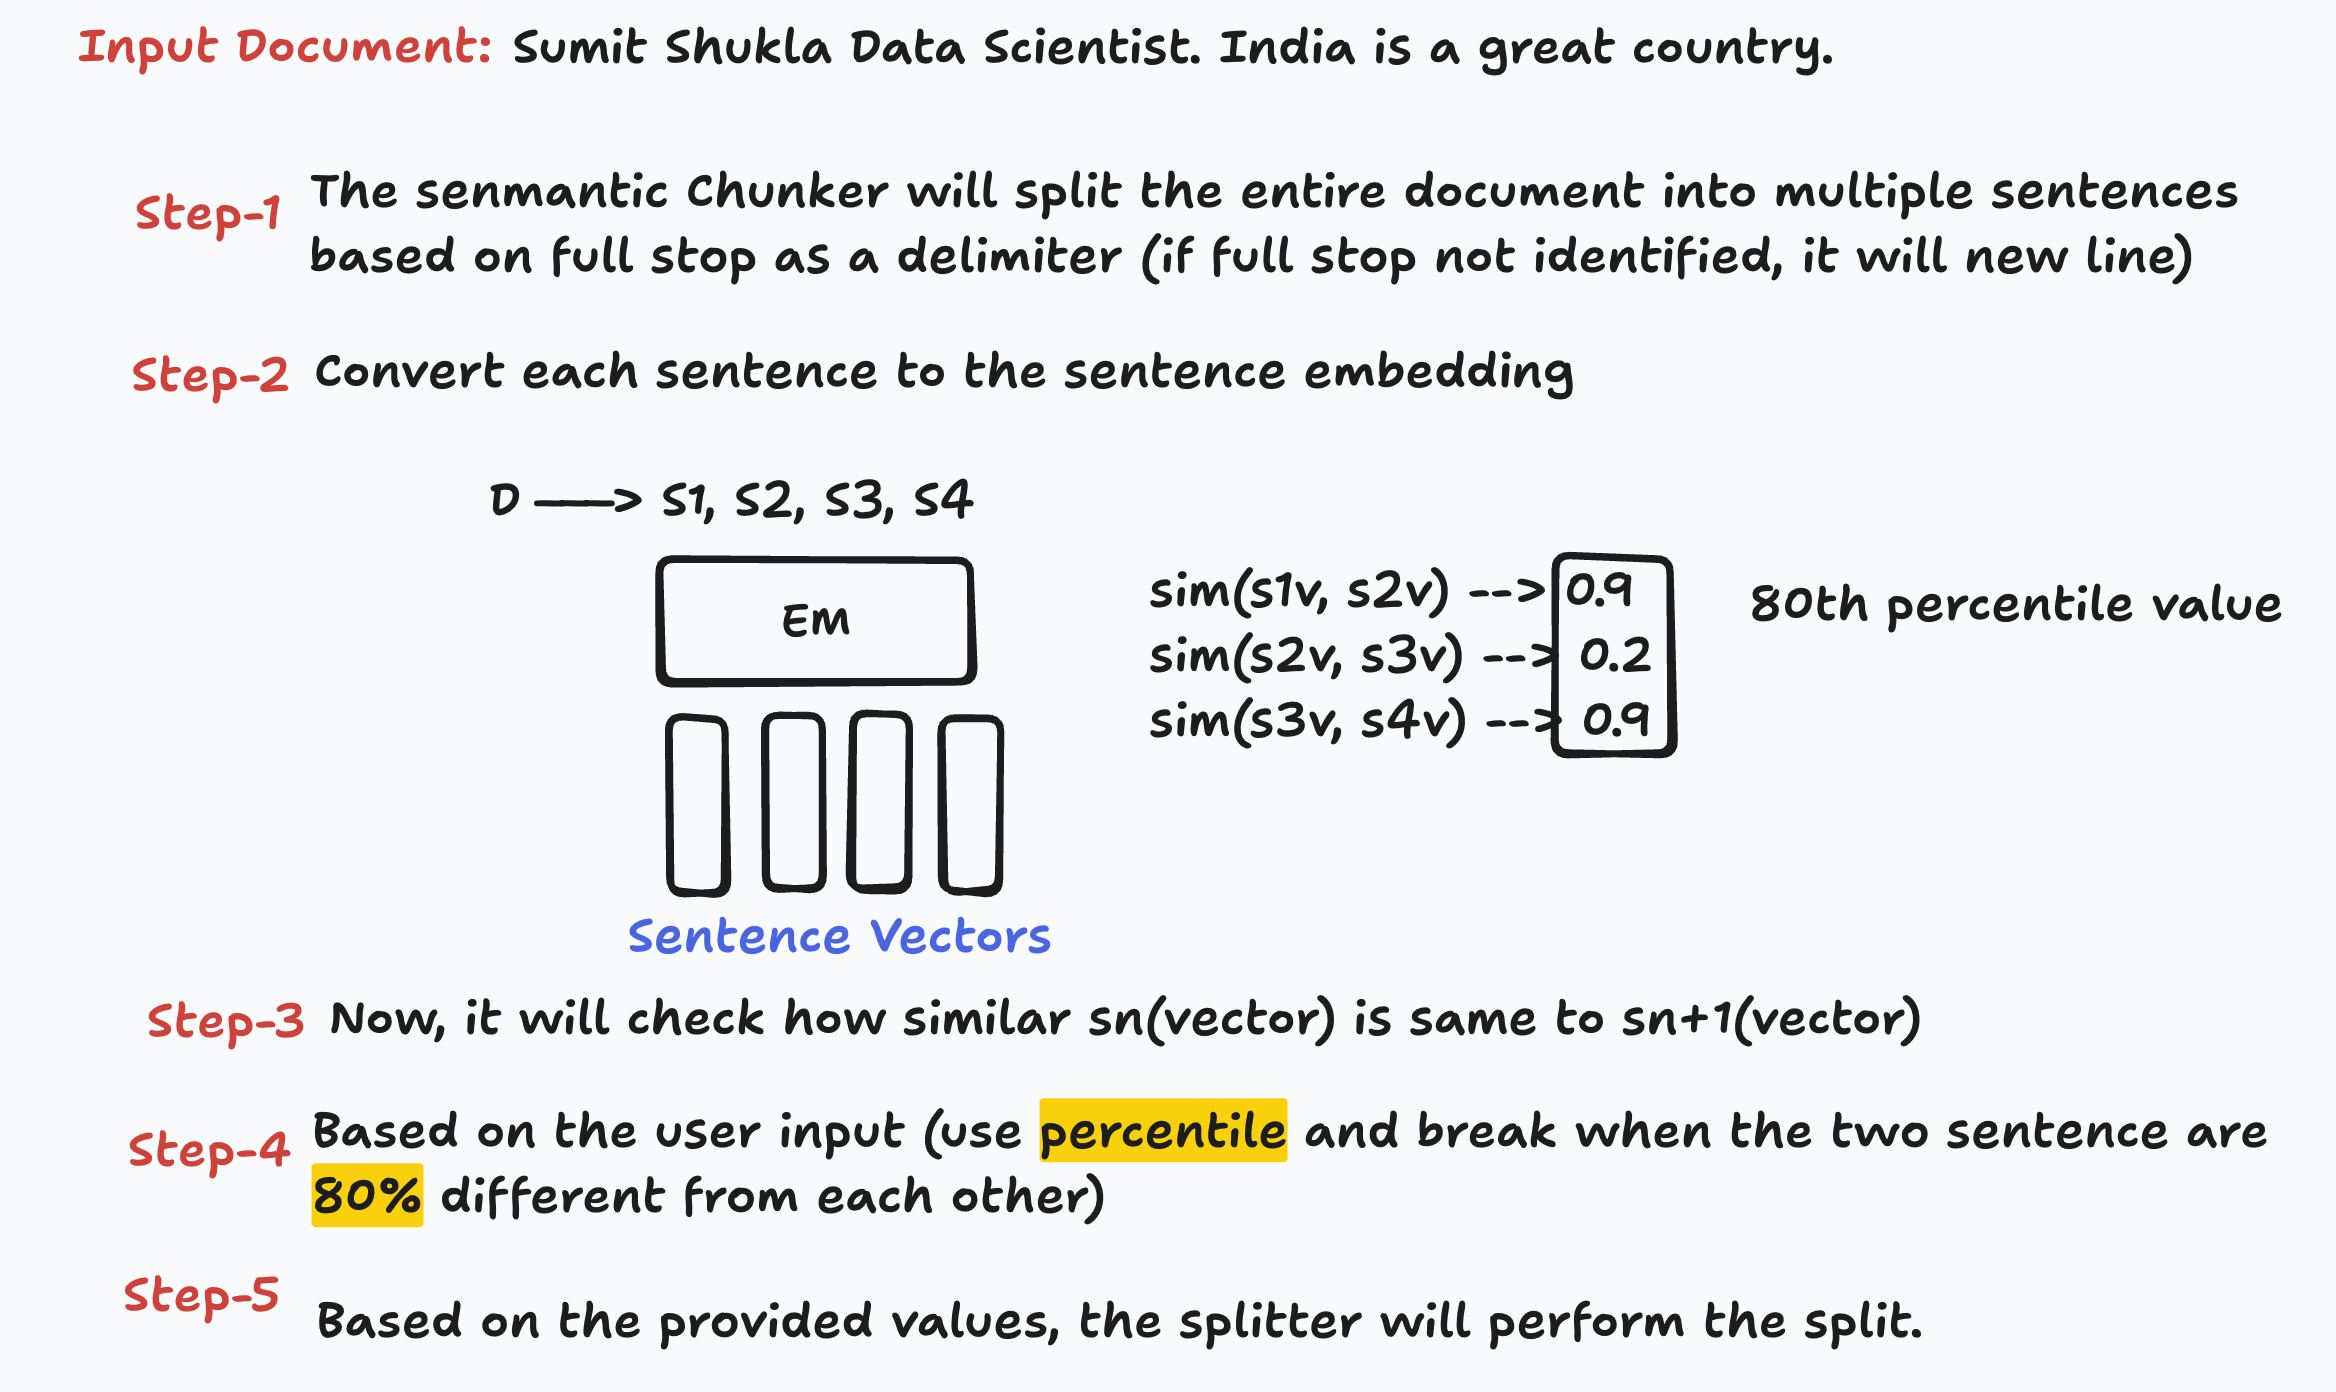

In [ ]:
text = """
Quantum computing represents a revolutionary approach to processing information. Unlike classical computers that use bits representing 0 or 1, quantum computers use qubits that can exist in superposition, representing both states simultaneously. This property, combined with quantum entanglement, allows quantum computers to solve certain problems exponentially faster than classical computers. Companies like IBM, Google, and startups are racing to build practical quantum computers. The technology promises breakthroughs in cryptography, drug discovery, financial modeling, and optimization problems that are currently intractable for traditional computers.

The Mediterranean diet has long been celebrated as one of the healthiest eating patterns in the world. Originating from countries bordering the Mediterranean Sea, this diet emphasizes whole grains, fresh fruits and vegetables, olive oil, fish, and moderate amounts of dairy and wine. Research consistently shows that people following this diet have lower rates of heart disease, diabetes, and certain cancers. The anti-inflammatory properties of olive oil, combined with omega-3 fatty acids from fish and antioxidants from produce, create a powerful nutritional profile. Beyond physical health, the Mediterranean lifestyle promotes social eating and mindful enjoyment of meals.
"""

In [ ]:
print(text)


Quantum computing represents a revolutionary approach to processing information. Unlike classical computers that use bits representing 0 or 1, quantum computers use qubits that can exist in superposition, representing both states simultaneously. This property, combined with quantum entanglement, allows quantum computers to solve certain problems exponentially faster than classical computers. Companies like IBM, Google, and startups are racing to build practical quantum computers. The technology promises breakthroughs in cryptography, drug discovery, financial modeling, and optimization problems that are currently intractable for traditional computers.

The Mediterranean diet has long been celebrated as one of the healthiest eating patterns in the world. Originating from countries bordering the Mediterranean Sea, this diet emphasizes whole grains, fresh fruits and vegetables, olive oil, fish, and moderate amounts of dairy and wine. Research consistently shows that people following this

In the above example both the sentences follows two different contextual meaning and using any of the text splitter we will not be able to achieve the right chunk split.

- Whenever we have a document with multiple content related to different context, we can use Senmantic Chunker.

In [ ]:
!pip install -q langchain_experimental langchain_openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.1/210.1 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 62.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 49.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 3.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.


In [ ]:
from langchain_experimental.text_splitter import SemanticChunker
from langchain_openai import OpenAIEmbeddings

from langchain_openai import OpenAIEmbeddings
open_ai_em = OpenAIEmbeddings(
    openai_api_key=os.getenv("OPENROUTER_API_KEY"),
    openai_api_base=os.getenv("OPENROUTER_BASE_URL"),
    model="text-embedding-3-small", # Or any model on OpenRouter
    default_headers={
        "HTTP-Referer": os.getenv("APP_URL"),
        "X-Title": os.getenv("APP_NAME"),
    }
)

splitter = SemanticChunker(
    embeddings=open_ai_em,
    breakpoint_threshold_type  = "percentile",
    breakpoint_threshold_amount = 80
)

text = """
Quantum computing represents a revolutionary approach to processing information. Unlike classical computers that use bits representing 0 or 1, quantum computers use qubits that can exist in superposition, representing both states simultaneously. This property, combined with quantum entanglement, allows quantum computers to solve certain problems exponentially faster than classical computers. Companies like IBM, Google, and startups are racing to build practical quantum computers. The technology promises breakthroughs in cryptography, drug discovery, financial modeling, and optimization problems that are currently intractable for traditional computers.

The Mediterranean diet has long been celebrated as one of the healthiest eating patterns in the world. Originating from countries bordering the Mediterranean Sea, this diet emphasizes whole grains, fresh fruits and vegetables, olive oil, fish, and moderate amounts of dairy and wine. Research consistently shows that people following this diet have lower rates of heart disease, diabetes, and certain cancers. The anti-inflammatory properties of olive oil, combined with omega-3 fatty acids from fish and antioxidants from produce, create a powerful nutritional profile. Beyond physical health, the Mediterranean lifestyle promotes social eating and mindful enjoyment of meals.
"""

chunk = splitter.create_documents([text])

In [ ]:
len(chunk)

3

In [ ]:
chunk[0].page_content

'\nQuantum computing represents a revolutionary approach to processing information. Unlike classical computers that use bits representing 0 or 1, quantum computers use qubits that can exist in superposition, representing both states simultaneously. This property, combined with quantum entanglement, allows quantum computers to solve certain problems exponentially faster than classical computers. Companies like IBM, Google, and startups are racing to build practical quantum computers. The technology promises breakthroughs in cryptography, drug discovery, financial modeling, and optimization problems that are currently intractable for traditional computers.'

In [ ]:
chunk[1].page_content

'The Mediterranean diet has long been celebrated as one of the healthiest eating patterns in the world. Originating from countries bordering the Mediterranean Sea, this diet emphasizes whole grains, fresh fruits and vegetables, olive oil, fish, and moderate amounts of dairy and wine. Research consistently shows that people following this diet have lower rates of heart disease, diabetes, and certain cancers. The anti-inflammatory properties of olive oil, combined with omega-3 fatty acids from fish and antioxidants from produce, create a powerful nutritional profile. Beyond physical health, the Mediterranean lifestyle promotes social eating and mindful enjoyment of meals.'

In [ ]:
chunk[2].page_content

''

In [ ]:
splitter.create_documents(["My name is sumit. India is a great country"])

[Document(metadata={}, page_content='My name is sumit. India is a great country')]

**Contextualized Chunking**

In [ ]:
! pip install -q langchain_text_splitters langchain_community

In [ ]:
from langchain_community.document_loaders import TextLoader
loader = TextLoader('/content/kb_modiji.txt')
doc = loader.load()

In [ ]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_core.documents import Document

import os
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(
    openai_api_key=os.getenv("OPENROUTER_API_KEY"),
    openai_api_base=os.getenv("OPENROUTER_BASE_URL"),
    model_name="gpt-4o-mini-2024-07-18", # Or any model on OpenRouter
    default_headers={
        "HTTP-Referer": os.getenv("APP_URL"),
        "X-Title": os.getenv("APP_NAME"),
    }
)

from langchain_text_splitters import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 500,
    chunk_overlap = 0,
    separators=["\n\n", "\n", " "]
    # separators=["\n\n", "\n", ".", "?", "!", " ", ""]
)

document_text = doc[0].page_content
# Here we can have one more chunking which will generate bigger chunks which
# we can provide to LLM as a Doc
chunks = text_splitter.split_text(document_text)


context_prompt = ChatPromptTemplate.from_template(
    """
    <document>
    {doc_content}
    </document>

    Here is a chunk we are sending to an embedding model:
    <chunk>
    {chunk_content}
    </chunk>

    Please give a short (1-2 sentence) context to situate this chunk within the overall document for the purposes of improving search retrieval.
    Answer only with the context string.
    """
)

new_chunk = []

for c in chunks:

  final_prompt = context_prompt.format(doc_content = document_text, chunk_content = c)
  response = llm.invoke(final_prompt)
  new_chunk.append(Document(page_content = response.content, metadata = {"original_chunk":c}))




In [ ]:
new_chunk[0]

Document(metadata={'original_chunk': '# HISTORY OF NARENDRA MODI\n\n## Early Life and Background\n\n**Birth and Family:**\n- Born: September 17, 1950, in Vadnagar, Gujarat, India\n- Parents: Damodardas Mulchand Modi (father) and Hiraben Modi (mother)\n- Family Background: Born into a lower-middle-class family of the Ghanchi-Teli (oil-presser) community\n- Siblings: Third of six children'}, page_content="The chunk provides an overview of Narendra Modi's early life and background, detailing his birth, family, and upbringing, which sets the foundation for understanding his subsequent political career and leadership style as Prime Minister of India.")

In [ ]:
new_chunk[9]

Document(metadata={'original_chunk': '*Major Initiatives:*\n- Swachh Bharat Abhiyan (Clean India Mission)\n- Make in India campaign\n- Digital India initiative\n- Jan Dhan Yojana (financial inclusion)\n- Skill India program\n- Pradhan Mantri Ujjwala Yojana (LPG connections)\n- Goods and Services Tax (GST) implementation (2017)\n- Demonetization (November 2016)'}, page_content="This chunk details the major initiatives launched during Narendra Modi's first term as Prime Minister of India from 2014 to 2019, highlighting key policies aimed at economic development, social welfare, and governance reforms.")

## Proposition Chunking

In [ ]:
import os
from langchain_core.prompts import PromptTemplate
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(
    openai_api_key=os.getenv("OPENROUTER_API_KEY"),
    openai_api_base=os.getenv("OPENROUTER_BASE_URL"),
    model_name="gpt-4o-mini-2024-07-18", # Or any model on OpenRouter
    default_headers={
        "HTTP-Referer": os.getenv("APP_URL"),
        "X-Title": os.getenv("APP_NAME"),
    }
)

PROPOSITION_PROMPT = PromptTemplate.from_template(
    """
    You are an expert data engineer building a RAG system.
    Your task is to decompose the "Current Text" into simple, atomic propositions (facts).

    ### INPUT DATA
    1. **Document Title**: {title} (Use this for global context)
    2. **Previous Context**: {previous_window} (READ-ONLY. Use this ONLY to resolve pronouns like 'he', 'it', 'they' in the current text.)
    3. **Current Text**: {current_chunk} (EXTRACT facts from this text only.)

    ### RULES
    - **Atomic Facts**: Each sentence must be a standalone fact.
    - **Coreference Resolution**: If 'Current Text' says "He decided...", and 'Previous Context' identifies him as "Elon Musk", write "Elon Musk decided...".
    - **Isolation**: DO NOT create propositions from the 'Previous Context'. Only the 'Current Text'.

    ### OUTPUT
    Return a list of sentences separated by newlines.
    """
)

proposition_chain = PROPOSITION_PROMPT | llm

document_title = "Description about Mr.Narendra Modi (PM of India)"

from langchain_community.document_loaders import TextLoader
loader = TextLoader('/content/kb_modiji.txt')
doc = loader.load()

full_text = doc[0].page_content


from langchain_text_splitters import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 500,
    chunk_overlap = 0,
    separators=["\n\n", "\n", " "]
    # separators=["\n\n", "\n", ".", "?", "!", " ", ""]
)

chunks = text_splitter.split_text(full_text)

final_chunk = []
window_size = 2
history = []

for i, current_chunk in enumerate(chunks):
  if not current_chunk.strip():
    continue

  previous_chunk = " ".join(history[-window_size:]) if history else "No Previous Context"
  response = proposition_chain.invoke({
      "title": document_title,
      "previous_window": previous_chunk,
      "current_chunk": current_chunk
  })
  p = response.content.split("\n")
  clean_p = [i.strip() for i in p if i.strip()]
  final_chunk.extend(clean_p)
  history.append(current_chunk)



In [ ]:
c = ["a", "b", "c", "d"]
for i in enumerate(c):
  print(i)

(0, 'a')
(1, 'b')
(2, 'c')
(3, 'd')


In [ ]:
c = ["a", "b", "c", "d"]
" ".join(c[-2:])

'c d'

In [ ]:
"Sachin is a great player\nSachin played for India"

In [ ]:
final_chunk

['- Narendra Modi was born on September 17, 1950, in Vadnagar, Gujarat, India.',
 "- Narendra Modi's father is Damodardas Mulchand Modi.",
 "- Narendra Modi's mother is Hiraben Modi.",
 '- Narendra Modi was born into a lower-middle-class family of the Ghanchi-Teli (oil-presser) community.',
 '- Narendra Modi is the third of six children.',
 '- Narendra Modi helped his father run a tea stall at the Vadnagar railway station.',
 '- Narendra Modi was described as an average student.',
 '- Narendra Modi was more interested in theater and debates than academics.',
 '- Narendra Modi had an early interest in politics and public speaking.',
 '- Narendra Modi completed higher secondary education in Vadnagar.',
 "- Narendra Modi obtained a Bachelor's degree in Political Science from Delhi University in 1978 through distance learning.",
 "- Narendra Modi earned a Master's degree in Political Science from Gujarat University in 1983.",
 '- Narendra Modi was influenced by nationalist literature and i

**Summarize**

- RAG Components
    - Embedding Model
    - Chunking
    - Vector DB
    - Reterival
    - LLM
- Embedding Model
    - Sentence Transformer: BERT
    - OpenAI Embeddings
    - Hugging Face BGE-M3
- Document Loaders
    - Text Loader
    - PyPDF Loader
    - WebBased Loaders
- Chunking Techniques
    - CharacterTextSplitter
    - RecursiveCharacterTextSplitter
    - Semantic Chunking
    - Contextulised Chunking
    - Proposition Chunking